In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dvg_filtered_cb = pd.read_csv('dvg_filtered_cb.csv')
dvg_filtered_cb.head()

,Unnamed: 0,DVG.stype,Length,BP_Pos_RI_Pos,BP_Pos,RI_Pos,Delta_Positions,Ref,Counts,X._to_Virus,Samples,Rule_of_six,strand,reverse,total_count
0,1,5'cb/sbDVG,336,15652_15802,15652,15802,150,SSPE|SSPE,5644,3.12%|2.47%,PL_DI_counts_filtered,YES,minus,True,16615
1,2,5'cb/sbDVG,1302,14698_15790,14698,15790,1092,SSPE|SSPE,226,0.19%|0.11%,TL_DI_counts_filtered,YES,minus,True,10366
2,3,5'cb/sbDVG,1302,14735_15753,14735,15753,1018,SSPE|SSPE,8774,7.04%|4.97%,OL_DI_counts_filtered,YES,minus,True,8960
3,4,5'cb/sbDVG,324,15673_15793,15673,15793,120,SSPE|SSPE,5281,4.64%|5.2%,HC_DI_counts_filtered,YES,minus,True,8559
4,5,5'cb/sbDVG,1302,14736_15752,14736,15752,1016,SSPE|SSPE,223,0.18%|0.13%,OL_DI_counts_filtered,YES,minus,True,7983


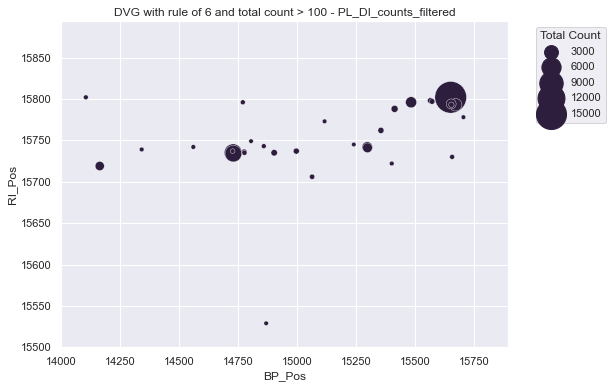

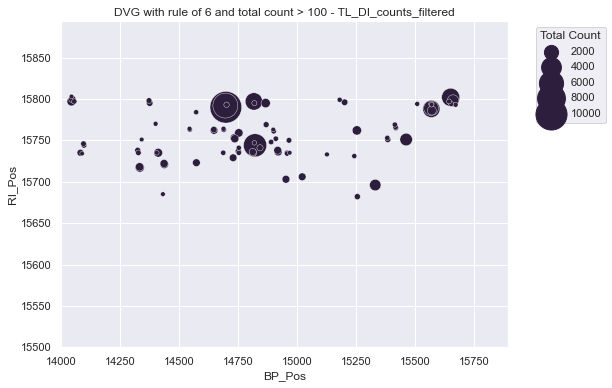

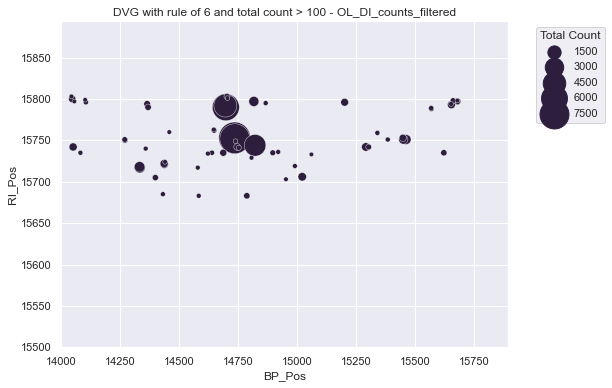

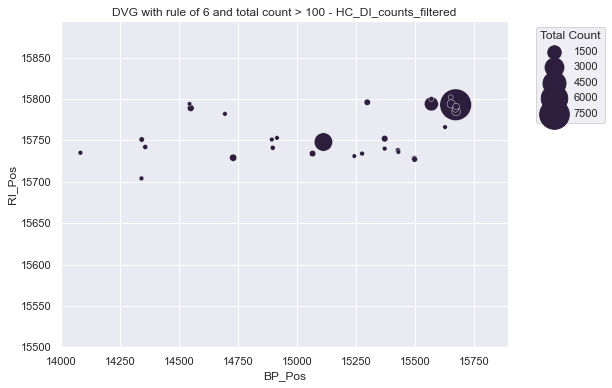

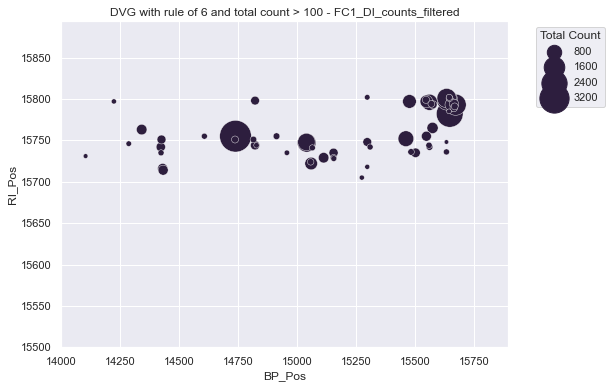

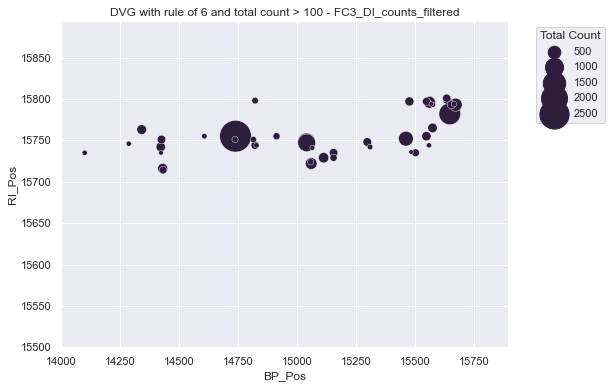

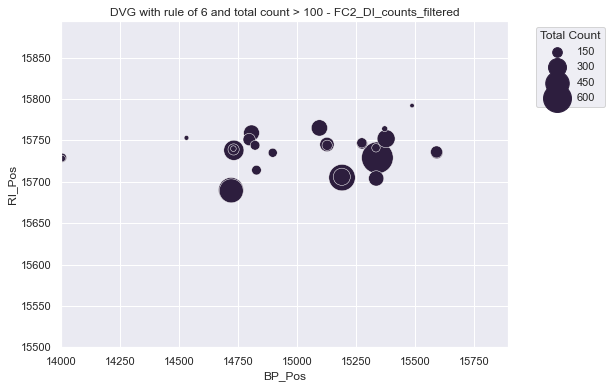

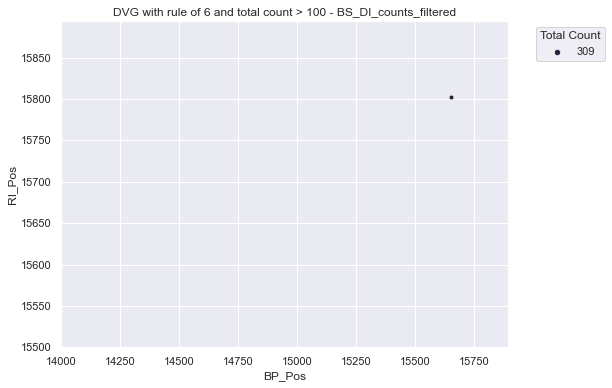

In [47]:
# Set the style
sns.set_theme()

# Create a PDF file to save the plots
pdf_filename = "combined_plots_filtered_ruleof6and100_pv.pdf"
pdf_pages = PdfPages(pdf_filename)

# Specify the zoomed-in ranges for BP_Pos and RI_Pos
zoomed_bp_range = (14000, 15894)
zoomed_ri_range = (15500, 15894)

# Loop through unique samples
for sample in dvg_filtered_cb['Samples'].unique():
    plot_data = dvg_filtered_cb[dvg_filtered_cb['Samples'] == sample]

    # Set consistent scales for x, y, and total_count
    plt.figure(figsize=(8, 6))
    scatter_plot = sns.scatterplot(
        data=plot_data,
        x='BP_Pos',
        y='RI_Pos',
        hue='total_count',
        size='total_count',
        palette='RdYlGn',
        sizes=(20, 1000),
        hue_norm=(0, 7), 
       )

    # Set consistent scales for x, y, and total_count
    plt.xlim(zoomed_bp_range)
    plt.ylim(zoomed_ri_range)
    scatter_plot.set(xlim=zoomed_bp_range, ylim=zoomed_ri_range)
    scatter_plot.legend(title='Total Count', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add labels and title
    plt.title(f"DVG with rule of 6 and total count > 100 - {sample}")
    plt.xlabel("BP_Pos")
    plt.ylabel("RI_Pos")

    # Save the plot to the PDF file
    pdf_pages.savefig()

# Close the PDF file
pdf_pages.close()


In [51]:
pivot_df_log_v1 = pd.read_csv('pivot_df_log_v1.csv')
pivot_df_log_v1.head()

,DVG_ID,BP_Pos,RI_Pos,PL_DI,TL_DI,OL_DI,HC_DI,FC1_DI,FC3_DI,FC2_DI,BS_DI
0,DVG_336_15652_15802,15652,15802,9.72,8.10,0.00,4.94,0.00,0.00,0.0,5.74
1,DVG_1302_14698_15790,14698,15790,0.00,9.25,8.78,0.00,0.00,0.00,0.0,0.00
2,DVG_1302_14735_15753,14735,15753,0.00,6.46,9.10,0.00,0.00,0.00,0.0,0.00
3,DVG_324_15673_15793,15673,15793,7.78,4.97,0.00,9.05,7.42,6.28,0.0,0.00
4,DVG_1302_14736_15752,14736,15752,0.00,6.35,8.99,0.00,0.00,0.00,0.0,0.00


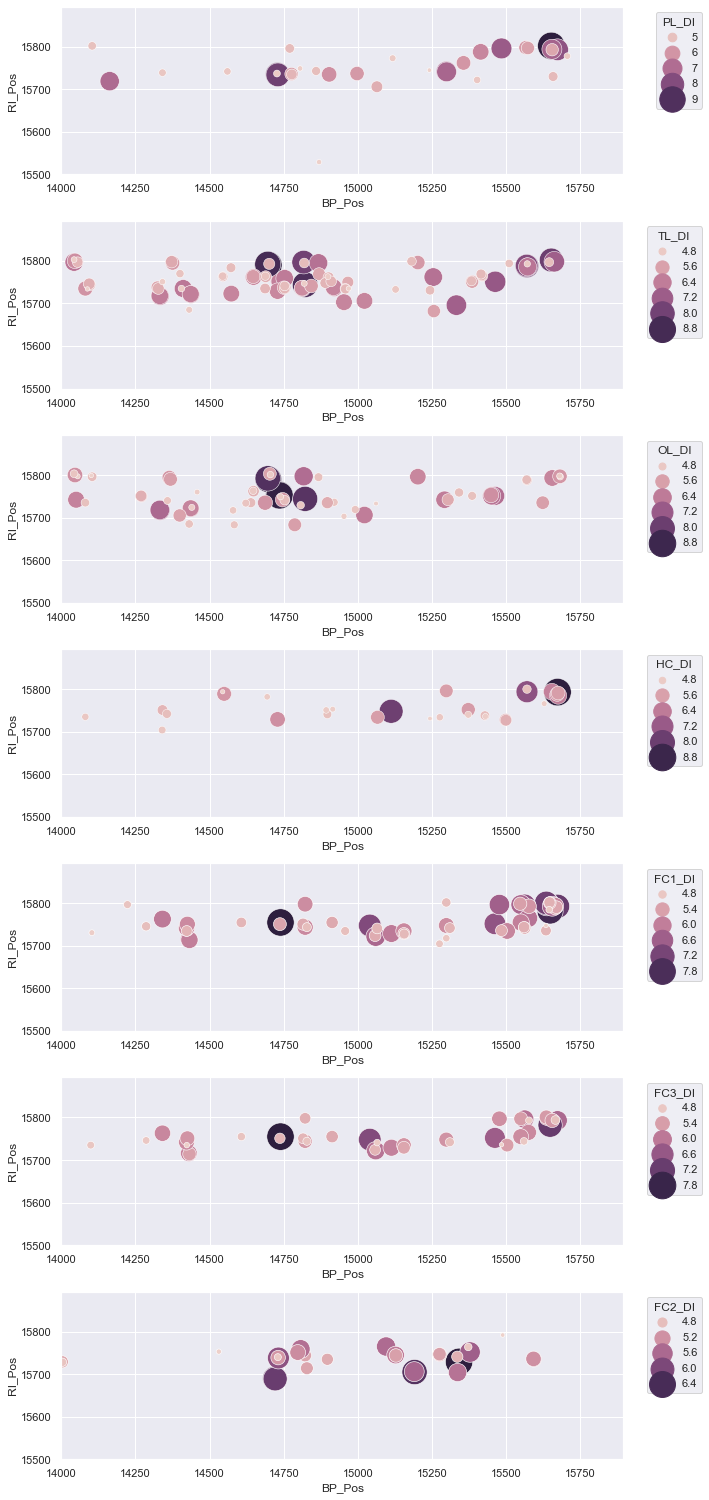

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Assuming pivot_df_log_v1 is your DataFrame
columns_to_plot = ["PL_DI", "TL_DI", "OL_DI", "HC_DI", "FC1_DI", "FC3_DI", "FC2_DI"]

# Specify the zoomed-in ranges for BP_Pos and RI_Pos
zoomed_bp_range = (14000, 15894)
zoomed_ri_range = (15500, 15894)

# Create a PDF file to save the plots
pdf_filename = "scatter_plots.pdf"
pdf_pages = PdfPages(pdf_filename)

# Set a consistent figure size
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 3 * len(columns_to_plot)))

# Loop through each column and create scatter plots
for idx, column in enumerate(columns_to_plot):
    # Filter out zero values
    filtered_data = pivot_df_log_v1[pivot_df_log_v1[column] != 0]

    # Create the scatter plot with filtered data and zoomed-in ranges
    scatter_plot = sns.scatterplot(
        ax=axes[idx],
        data=filtered_data, x="BP_Pos", y="RI_Pos", hue=column, size=column,
        sizes=(20, 750)
    )

    # Set axis limits for zooming in
    scatter_plot.set_xlim(zoomed_bp_range)
    scatter_plot.set_ylim(zoomed_ri_range)

    # Customize the legend sizes based on actual values
    legend_labels = [float(label.get_text()) for label in scatter_plot.get_legend().get_texts()]
    if len(legend_labels) > 1:
        legend_sizes = [20 + 480 * (value - min(legend_labels)) / (max(legend_labels) - min(legend_labels)) for value in legend_labels]
        scatter_plot.get_legend().set_title(column)
        scatter_plot.get_legend().set_bbox_to_anchor((1.15, 1))
    
    # Remove overlapping legend
    #scatter_plot.get_legend().remove()

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plots to the PDF file
pdf_pages.savefig()

# Close the PDF file
pdf_pages.close()
